In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
rfr_df = pd.read_csv("data/pred/dbt_forecast_rfr.csv")
svr_df = pd.read_csv("data/pred/dbt_forecast_svr.csv")
xgb_df = pd.read_csv("data/pred/dbt_forecast_xgb.csv")


In [6]:
rfr_df["DateTime"] = pd.to_datetime(rfr_df["DateTime"])
svr_df["DateTime"] = pd.to_datetime(svr_df["DateTime"])
xgb_df["DateTime"] = pd.to_datetime(xgb_df["DateTime"])

In [7]:
merged_df = rfr_df[["DateTime", "Predicted_DBT"]].rename(columns={"Predicted_DBT": "RFR_DBT"})
merged_df["SVR_DBT"] = svr_df["Predicted_DBT"]
merged_df["XGB_DBT"] = xgb_df["Predicted_DBT"]

In [8]:
sns.set(style="whitegrid")


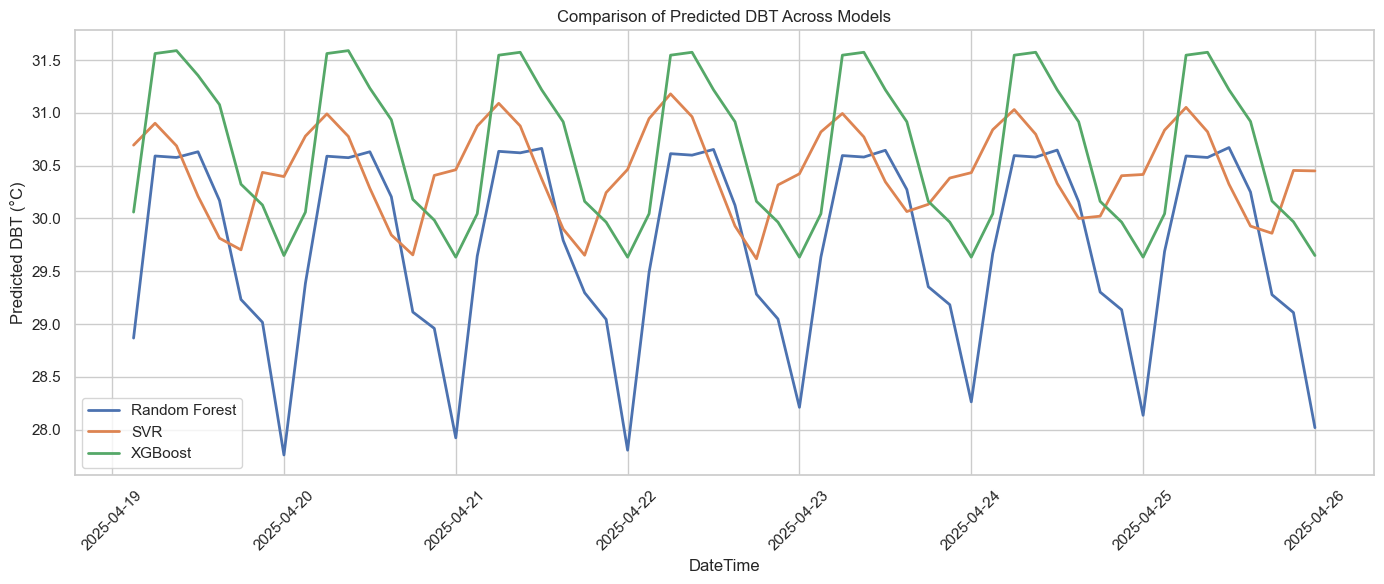

In [9]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df, x="DateTime", y="RFR_DBT", label="Random Forest", linewidth=2)
sns.lineplot(data=merged_df, x="DateTime", y="SVR_DBT", label="SVR", linewidth=2)
sns.lineplot(data=merged_df, x="DateTime", y="XGB_DBT", label="XGBoost", linewidth=2)
plt.title("Comparison of Predicted DBT Across Models")
plt.xlabel("DateTime")
plt.ylabel("Predicted DBT (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()